# Biodiversity Dataset

This dataset is from the National Parks Service about endangered species in different parks.

> ## Exploring Data:

First, I want to know the number of columns, what type they are, unique and number of unique values they contain. From there, I can know if I have missing data and explore it further to know how to treat it.

In [2]:
# Importing libraries and read both datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

observations = pd.read_csv('observations.csv')
species = pd.read_csv('species_info.csv')

In [3]:
# Merge both datasets into a single one and look at the merged information
biodiversity = species.merge(right = observations, how = 'outer', on = 'scientific_name')
biodiversity.head()

,category,scientific_name,common_names,conservation_status,park_name,observations
0,Vascular Plant,Abies bifolia,Rocky Mountain Alpine Fir,NaN,Bryce National Park,109
1,Vascular Plant,Abies bifolia,Rocky Mountain Alpine Fir,NaN,Yellowstone National Park,215
2,Vascular Plant,Abies bifolia,Rocky Mountain Alpine Fir,NaN,Great Smoky Mountains National Park,72
3,Vascular Plant,Abies bifolia,Rocky Mountain Alpine Fir,NaN,Yosemite National Park,136
4,Vascular Plant,Abies concolor,"Balsam Fir, Colorado Fir, Concolor Fir, Silver...",NaN,Great Smoky Mountains National Park,101


In [4]:
# Get to know the number of columns, their data type and null values
biodiversity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25632 entries, 0 to 25631
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             25632 non-null  object
 1   scientific_name      25632 non-null  object
 2   common_names         25632 non-null  object
 3   conservation_status  880 non-null    object
 4   park_name            25632 non-null  object
 5   observations         25632 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 1.2+ MB


In [5]:
# Number of unique values
for column in biodiversity.columns:
    print(f'{column} unique values:')
    print(biodiversity[column].nunique())

category unique values:
7
scientific_name unique values:
5541
common_names unique values:
5504
conservation_status unique values:
4
park_name unique values:
4
observations unique values:
304


In [6]:
# Unique values for 'Category', 'Conservation Status' and 'Park Name' (fewest count of unique values)
columns_unique_values = ['category', 'conservation_status', 'park_name']

for column in columns_unique_values:
    print(f'{column} unique values:')
    print(biodiversity[column].unique())

category unique values:
['Vascular Plant' 'Nonvascular Plant' 'Bird' 'Amphibian' 'Reptile'
 'Mammal' 'Fish']
conservation_status unique values:
[nan 'Species of Concern' 'Threatened' 'Endangered' 'In Recovery']
park_name unique values:
['Bryce National Park' 'Yellowstone National Park'
 'Great Smoky Mountains National Park' 'Yosemite National Park']


In [7]:
# See duplicated values
biodiversity[biodiversity.duplicated() == True]

,category,scientific_name,common_names,conservation_status,park_name,observations
1668,Vascular Plant,Arctium minus,"Lesser Burdock, Lesser Burrdock",NaN,Yosemite National Park,162
1676,Vascular Plant,Arctium minus,"Beggar's Button, Burdock, Common Burdock, Less...",NaN,Yosemite National Park,162
2741,Vascular Plant,Botrychium virginianum,Rattlesnake Fern,NaN,Yellowstone National Park,232
2749,Vascular Plant,Botrychium virginianum,"Common Grapefern, Rattlesnake Fern",NaN,Yellowstone National Park,232
5638,Vascular Plant,Cichorium intybus,"Chickory, Chicory",NaN,Yellowstone National Park,266
5646,Vascular Plant,Cichorium intybus,"Blue Sailors, Chickory, Chicory, Coffeeweed, C...",NaN,Yellowstone National Park,266
8119,Vascular Plant,Echinochloa crus-galli,Barnyard Grass,NaN,Great Smoky Mountains National Park,62
8127,Vascular Plant,Echinochloa crus-galli,"Barnyard Grass, Barnyardgrass, Cockspur, Japan...",NaN,Great Smoky Mountains National Park,62
8245,Vascular Plant,Eleocharis palustris,Spike-Rush,NaN,Great Smoky Mountains National Park,62
8253,Vascular Plant,Eleocharis palustris,"Common Spikerush, Creeping Spikerush, Creeping...",NaN,Great Smoky Mountains National Park,62


In [8]:
# Drop every duplicate value
biodiversity.drop_duplicates()

,category,scientific_name,common_names,conservation_status,park_name,observations
0,Vascular Plant,Abies bifolia,Rocky Mountain Alpine Fir,NaN,Bryce National Park,109
1,Vascular Plant,Abies bifolia,Rocky Mountain Alpine Fir,NaN,Yellowstone National Park,215
2,Vascular Plant,Abies bifolia,Rocky Mountain Alpine Fir,NaN,Great Smoky Mountains National Park,72
3,Vascular Plant,Abies bifolia,Rocky Mountain Alpine Fir,NaN,Yosemite National Park,136
4,Vascular Plant,Abies concolor,"Balsam Fir, Colorado Fir, Concolor Fir, Silver...",NaN,Great Smoky Mountains National Park,101
...,...,...,...,...,...,...
25627,Nonvascular Plant,Zygodon viridissimus,Zygodon Moss,NaN,Bryce National Park,100
25628,Nonvascular Plant,Zygodon viridissimus var. rupestris,Zygodon Moss,NaN,Yellowstone National Park,237
25629,Nonvascular Plant,Zygodon viridissimus var. rupestris,Zygodon Moss,NaN,Bryce National Park,102
25630,Nonvascular Plant,Zygodon viridissimus var. rupestris,Zygodon Moss,NaN,Yosemite National Park,210


> ## Exploring missing data:

In [9]:
# Get the % of missing data
max_rows = len(biodiversity)

print('% Missing Data:')
print((1 - biodiversity.count() / max_rows) * 100)

% Missing Data:
category                0.000000
scientific_name         0.000000
common_names            0.000000
conservation_status    96.566792
park_name               0.000000
observations            0.000000
dtype: float64


In [10]:
# Get every row with nan values
biodiversity[biodiversity.conservation_status.isna() == True]

,category,scientific_name,common_names,conservation_status,park_name,observations
0,Vascular Plant,Abies bifolia,Rocky Mountain Alpine Fir,NaN,Bryce National Park,109
1,Vascular Plant,Abies bifolia,Rocky Mountain Alpine Fir,NaN,Yellowstone National Park,215
2,Vascular Plant,Abies bifolia,Rocky Mountain Alpine Fir,NaN,Great Smoky Mountains National Park,72
3,Vascular Plant,Abies bifolia,Rocky Mountain Alpine Fir,NaN,Yosemite National Park,136
4,Vascular Plant,Abies concolor,"Balsam Fir, Colorado Fir, Concolor Fir, Silver...",NaN,Great Smoky Mountains National Park,101
...,...,...,...,...,...,...
25627,Nonvascular Plant,Zygodon viridissimus,Zygodon Moss,NaN,Bryce National Park,100
25628,Nonvascular Plant,Zygodon viridissimus var. rupestris,Zygodon Moss,NaN,Yellowstone National Park,237
25629,Nonvascular Plant,Zygodon viridissimus var. rupestris,Zygodon Moss,NaN,Bryce National Park,102
25630,Nonvascular Plant,Zygodon viridissimus var. rupestris,Zygodon Moss,NaN,Yosemite National Park,210


In [11]:
# Filter data by not null values of Conservation Status
filtered_data = biodiversity[['category', 'park_name', 'conservation_status']]
filtered_data = filtered_data[filtered_data.conservation_status.notna()]

# Group all data to know how many counts of Conservation Status I have in each Category and Park
grouped_data = filtered_data.groupby(['category', 'park_name', 'conservation_status']).size().reset_index(name = 'count')

In [12]:
# Pivot grouped data to find patterns
pivoted_data = grouped_data.pivot_table(index = ['category', 'park_name'], columns = 'conservation_status', values = 'count', fill_value = 0)
pivoted_data

conservation_status                                    Endangered  \
category          park_name                                         
Amphibian         Bryce National Park                         1.0   
                  Great Smoky Mountains National Park         1.0   
                  Yellowstone National Park                   1.0   
                  Yosemite National Park                      1.0   
Bird              Bryce National Park                         4.0   
                  Great Smoky Mountains National Park         4.0   
                  Yellowstone National Park                   4.0   
                  Yosemite National Park                      4.0   
Fish              Bryce National Park                         3.0   
                  Great Smoky Mountains National Park         3.0   
                  Yellowstone National Park                   3.0   
                  Yosemite National Park                      3.0   
Mammal            Bryce National Park                        11.0   
                  Great Smoky Mountains National Park        11.0   
                  Yellowstone National Park                  11.0   
                  Yosemite National Park                     11.0   
Nonvascular Plant Bryce National Park                         0.0   
                  Great Smoky Mountains National Park         0.0   
                  Yellowstone National Park                   0.0   
                  Yosemite National Park                      0.0   
Reptile           Bryce National Park                         0.0   
                  Great Smoky Mountains National Park         0.0   
                  Yellowstone National Park                   0.0   
                  Yosemite National Park                      0.0   
Vascular Plant    Bryce National Park                         1.0   
                  Great Smoky Mountains National Park         1.0   
                  Yellowstone National Park                   1.0   
                  Yosemite National Park                      1.0   

conservation_status                                    In Recovery  \
category          park_name                                          
Amphibian         Bryce National Park                          0.0   
                  Great Smoky Mountains National Park          0.0   
                  Yellowstone National Park                    0.0   
                  Yosemite National Park                       0.0   
Bird              Bryce National Park                          3.0   
                  Great Smoky Mountains National Park          3.0   
                  Yellowstone National Park                    3.0   
                  Yosemite National Park                       3.0   
Fish              Bryce National Park                          0.0   
                  Great Smoky Mountains National Park          0.0   
                  Yellowstone National Park                    0.0   
                  Yosemite National Park                       0.0   
Mammal            Bryce National Park                          3.0   
                  Great Smoky Mountains National Park          3.0   
                  Yellowstone National Park                    3.0   
                  Yosemite National Park                       3.0   
Nonvascular Plant Bryce National Park                          0.0   
                  Great Smoky Mountains National Park          0.0   
                  Yellowstone National Park                    0.0   
                  Yosemite National Park                       0.0   
Reptile           Bryce National Park                          0.0   
                  Great Smoky Mountains National Park          0.0   
                  Yellowstone National Park                    0.0   
                  Yosemite National Park                       0.0   
Vascular Plant    Bryce National Park                          0.0   
                  Great Smoky Mountains

In [13]:
# Create a new dataframe to contain Conservation Status missing data
missing_data = biodiversity[['category', 'park_name', 'conservation_status']].reset_index()
missing_data.head()

,index,category,park_name,conservation_status
0,0,Vascular Plant,Bryce National Park,NaN
1,1,Vascular Plant,Yellowstone National Park,NaN
2,2,Vascular Plant,Great Smoky Mountains National Park,NaN
3,3,Vascular Plant,Yosemite National Park,NaN
4,4,Vascular Plant,Great Smoky Mountains National Park,NaN


In [14]:
# Group missing data by Category, Park Name and Conservation Status to see a trend in missing data
null_counts = missing_data.groupby(['category', 'park_name'])['conservation_status'].apply(lambda x: x.isnull().count()).reset_index()
null_counts

,category,park_name,conservation_status
0,Amphibian,Bryce National Park,82
1,Amphibian,Great Smoky Mountains National Park,82
2,Amphibian,Yellowstone National Park,82
3,Amphibian,Yosemite National Park,82
4,Bird,Bryce National Park,591
5,Bird,Great Smoky Mountains National Park,591
6,Bird,Yellowstone National Park,591
7,Bird,Yosemite National Park,591
8,Fish,Bryce National Park,131
9,Fish,Great Smoky Mountains National Park,131


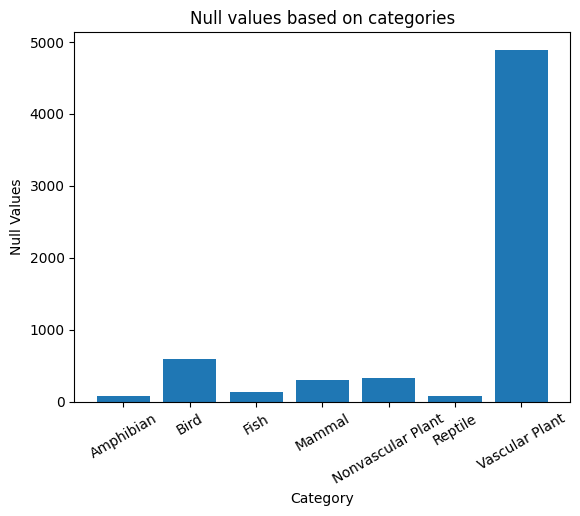

<Figure size 640x480 with 0 Axes>

In [15]:
# Drop Duplicates of Category because each Park has the same amount of missing values, it makes no difference
null_counts_clean = null_counts.drop_duplicates(subset = ['category']).reset_index()
null_counts_clean

plt.bar(null_counts.category, null_counts.conservation_status)
plt.xticks(rotation = 30)
plt.xlabel('Category')
plt.ylabel('Null Values')
plt.title('Null values based on categories')
plt.show()
plt.clf()

*Conservation Status*, the only column containing missing values, has four different outputs:

* Species of Concern
* Threatened
* Endangered
* In Recovery

I was concerned that, given a **96% of missing values**, I was going to have a biased dataset. Nevertheless, after analyzing those missing values based on each species Category, and Parks in this dataset, I can tell that this is a **Structurally Missing Data Type**, because if they are not one of these four outputs, it means that *they are not in danger*. Also, I can notice that every category missing value is present in each Park, giving me a second confirmation that this is *not random* at all.

It would be safe to **replace** missing values with the string **Not in Danger**.

In [16]:
# Replace Conservatin Status missing values with 'Not in Danger' string
biodiversity.conservation_status = biodiversity.conservation_status.fillna('Not in Danger')

biodiversity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25632 entries, 0 to 25631
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             25632 non-null  object
 1   scientific_name      25632 non-null  object
 2   common_names         25632 non-null  object
 3   conservation_status  25632 non-null  object
 4   park_name            25632 non-null  object
 5   observations         25632 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 1.2+ MB


In [17]:
biodiversity.head()

,category,scientific_name,common_names,conservation_status,park_name,observations
0,Vascular Plant,Abies bifolia,Rocky Mountain Alpine Fir,Not in Danger,Bryce National Park,109
1,Vascular Plant,Abies bifolia,Rocky Mountain Alpine Fir,Not in Danger,Yellowstone National Park,215
2,Vascular Plant,Abies bifolia,Rocky Mountain Alpine Fir,Not in Danger,Great Smoky Mountains National Park,72
3,Vascular Plant,Abies bifolia,Rocky Mountain Alpine Fir,Not in Danger,Yosemite National Park,136
4,Vascular Plant,Abies concolor,"Balsam Fir, Colorado Fir, Concolor Fir, Silver...",Not in Danger,Great Smoky Mountains National Park,101


> ## Analyze Data:

In [46]:
print(f'Observations Average: {biodiversity.observations.mean()}')
print(f'Observations Median: {biodiversity.observations.median()}')
print(f'Observations Mode: {biodiversity.observations.mode()[0]}')
print(f'Observations Min: {biodiversity.observations.min()}')
print(f'Observations Min: {biodiversity.observations.max()}')

Observations Average: 142.21469257178526
Observations Median: 124.0
Observations Mode: 84
Observations Min: 9
Observations Min: 321


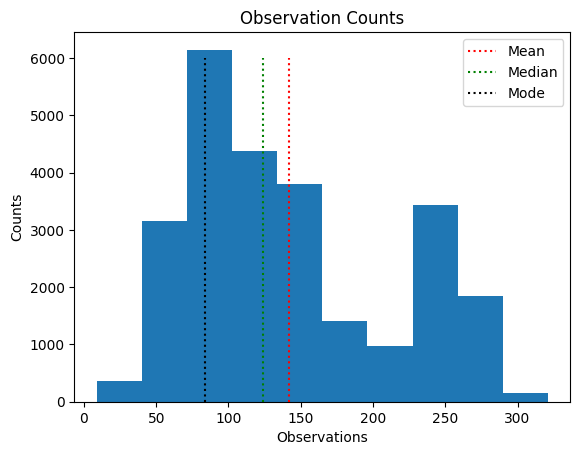

<Figure size 640x480 with 0 Axes>

In [44]:
plt.hist(biodiversity.observations)
plt.vlines(x = biodiversity.observations.mean(), ymin = 0, ymax = 6000, color = 'red', linestyles = 'dotted')
plt.vlines(x = biodiversity.observations.median(), ymin = 0, ymax = 6000, color = 'green', linestyles = 'dotted')
plt.vlines(x = biodiversity.observations.mode()[0], ymin = 0, ymax = 6000, color = 'black', linestyles = 'dotted')
plt.legend(['Mean', 'Median', 'Mode'])
plt.xlabel('Observations')
plt.ylabel('Counts')
plt.title('Observation Counts')
plt.show()
plt.clf()